In [1]:
# Importing required libraries.
import pandas as pd                                     # pip install pandas
from matplotlib import pyplot as plt                    # pip install matplotlib
import seaborn as sns                                   # pip install seaborn
from sklearn.preprocessing import StandardScaler        # pip install scikit-learn
from sklearn.model_selection import train_test_split
print('All imports done')

All imports done


In [2]:
# Reading the dataset into pandas dataframe
data = pd.read_csv("C:/Users/HP/Downloads/Career/ML/DataSets/creditcardfraud_ds.csv")  
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Get the info related to data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Time in this case is an unnecessary factor
data.drop(['Time'] , axis= 1 , inplace= True) 
data.shape 

(284807, 30)

In [5]:
# removing the duplicates from the data
data.drop_duplicates(keep= 'first' , inplace= True)
data.shape

(275663, 30)

In [6]:
# checking whether there are any empty cells in data
data.isnull().values.any()

False

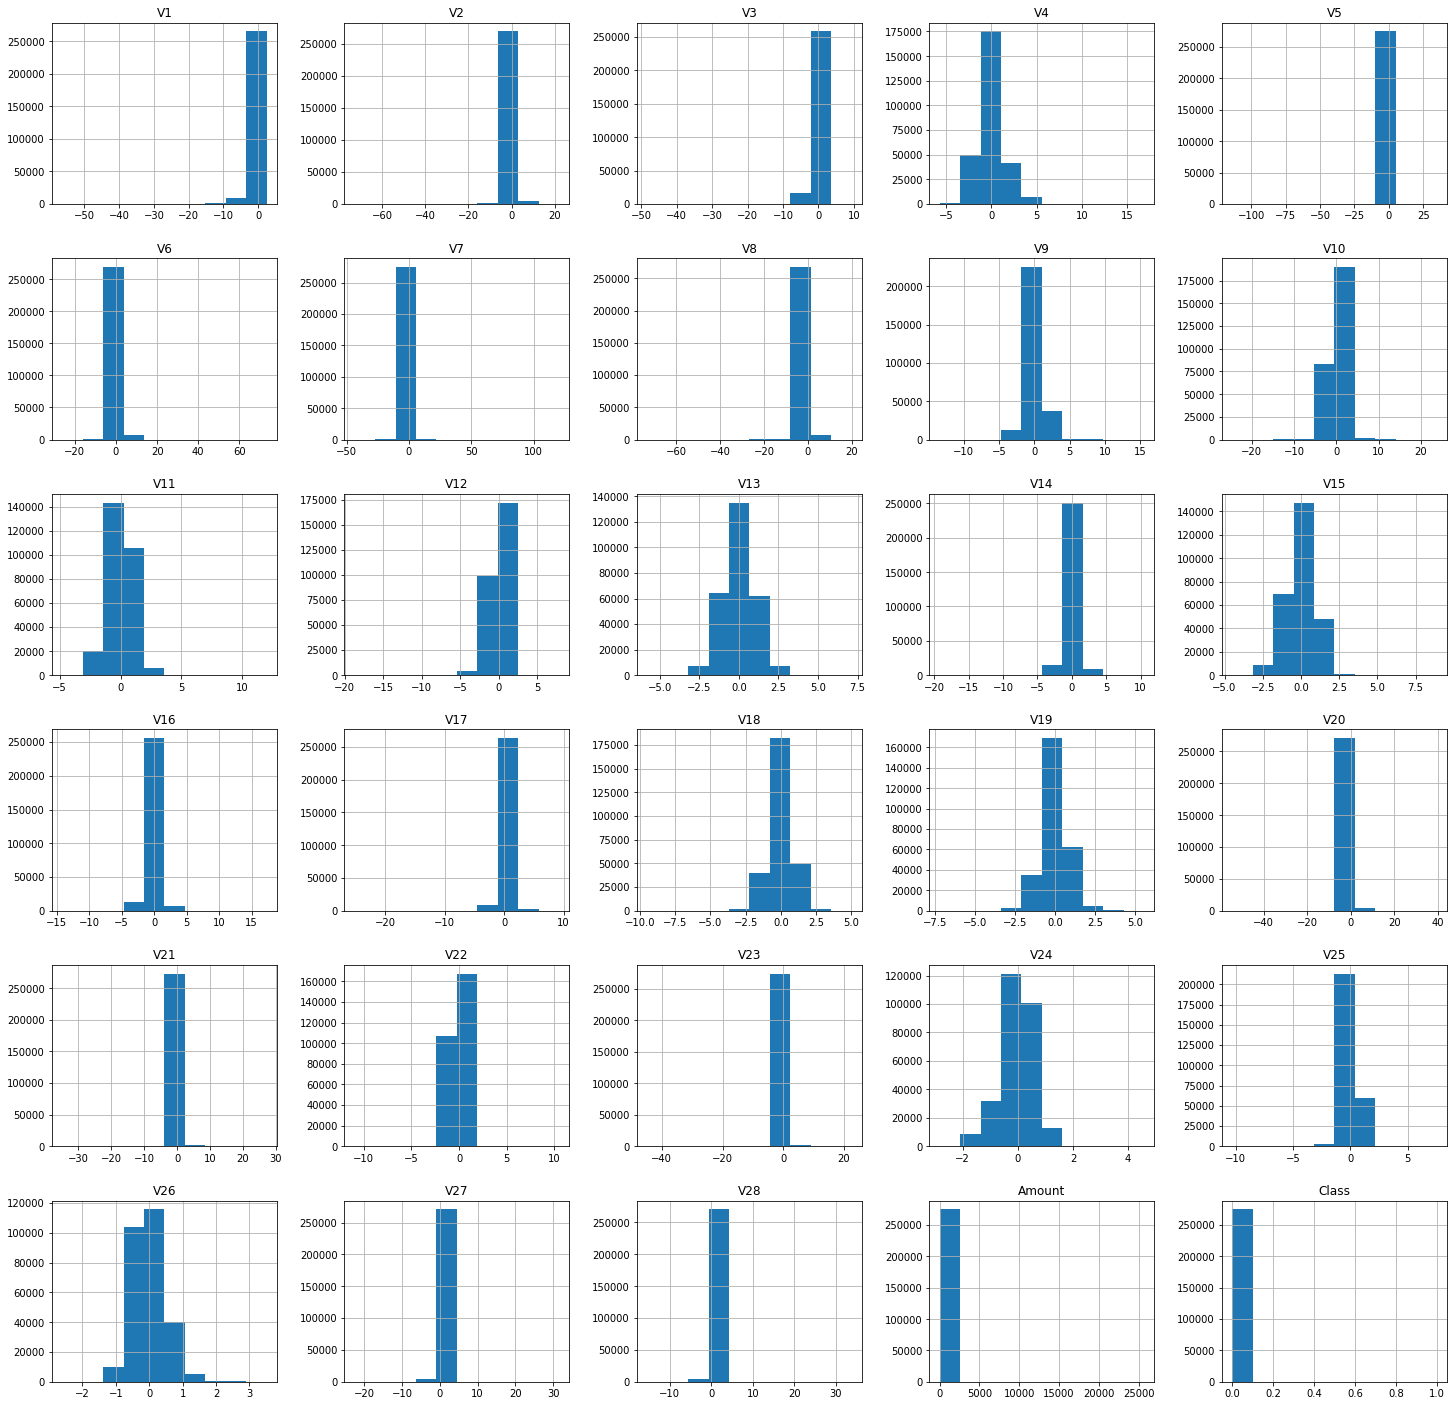

In [7]:
# plots the histograms of the each feature.
data.hist(figsize= (25,25))
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

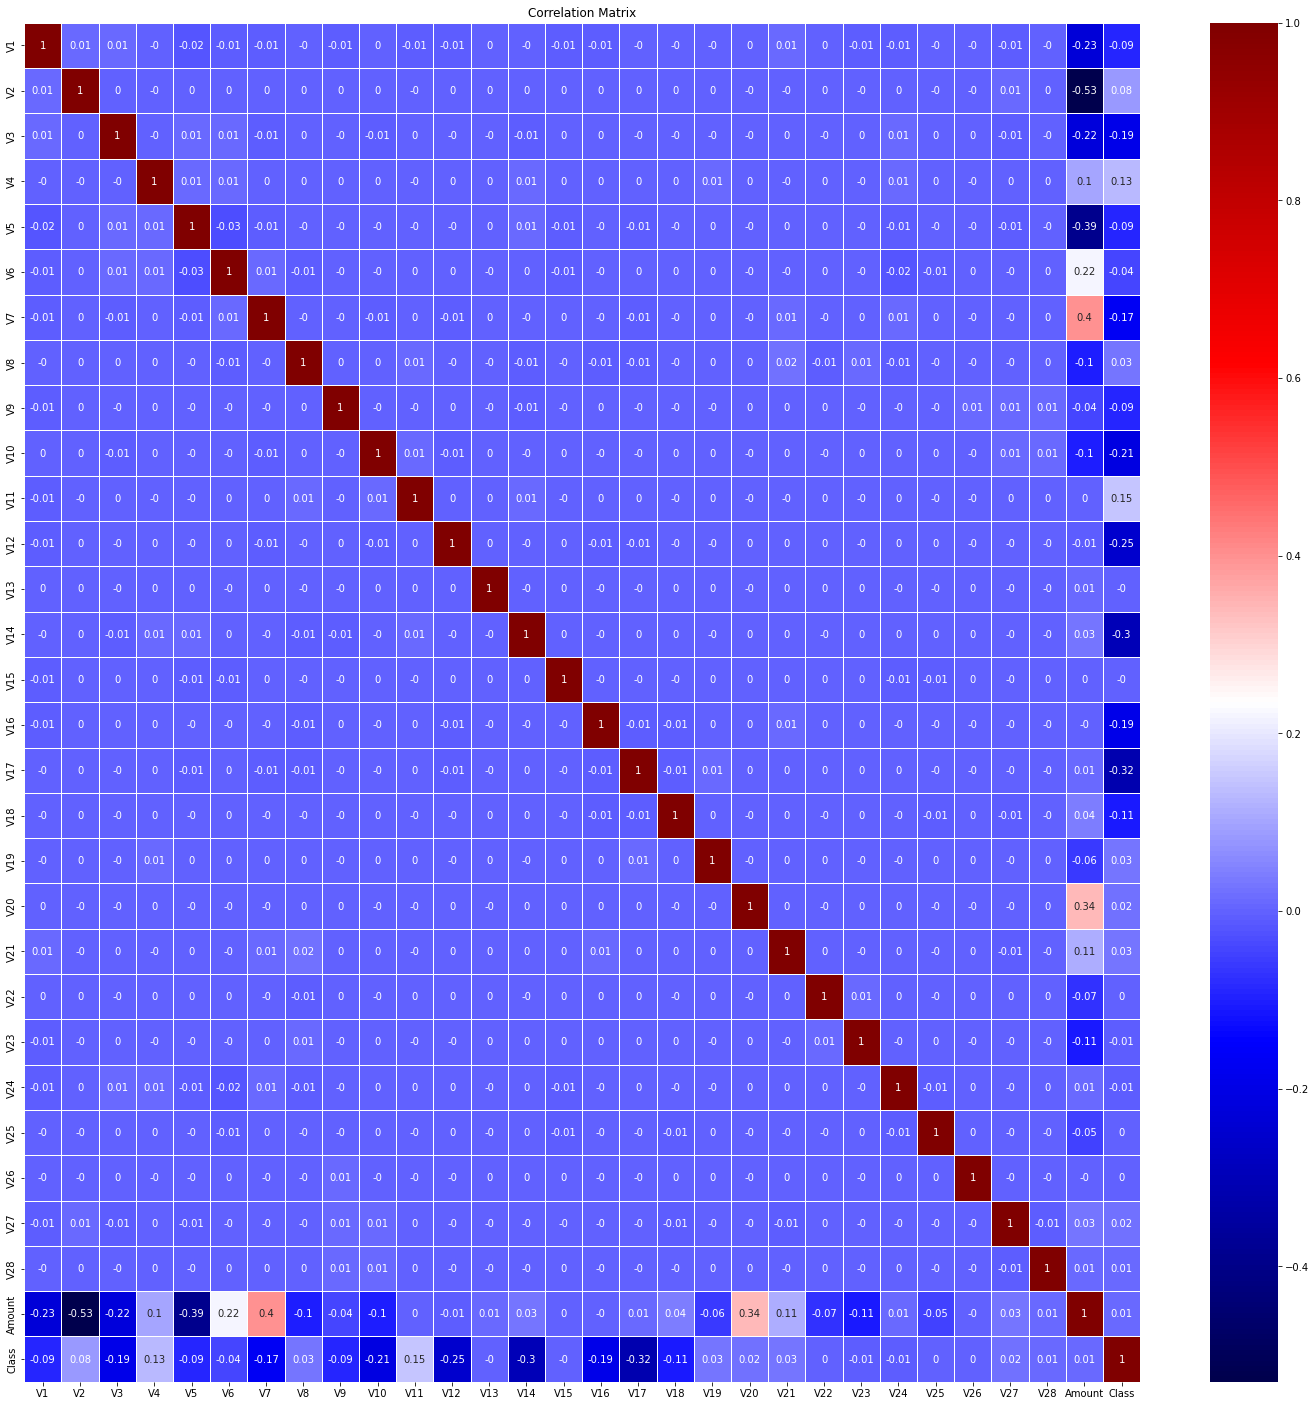

In [8]:
# Correlation Matrix
fig = plt.figure(figsize=(25,25))
plt.title('Correlation Matrix')
sns.heatmap(data.corr().round(2) , linewidths= .5 , annot= True , cmap= plt.get_cmap('seismic'))

Text(0, 0.5, 'Frequency (Number of transactions)')

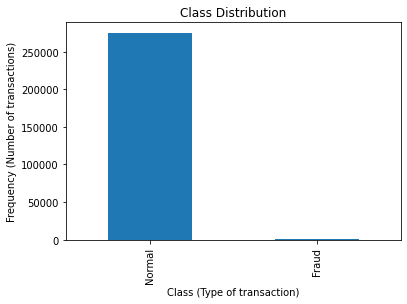

In [9]:
# plotting a bar graph showing normal transactions and fraud transactions.
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind= 'bar')
plt.xticks(range(2),['Normal','Fraud'])
plt.title('Class Distribution')
plt.xlabel('Class (Type of transaction)') 
plt.ylabel('Frequency (Number of transactions)')

From the above bar graph , We can conclude that dataset is highly imbalanced.

In [10]:
# Finding the number of normal transactions and fraud transactions in the dataset.
normal = data[data['Class'] == 0] 
fraud = data[data['Class'] == 1]
outlier_fraction = fraud.shape[0] / normal.shape[0]

print('Number of normal transactions are :' , normal.shape[0])
print('Number of fraud transactions are :' , fraud.shape[0])
print('Total number of transactions are :' , data.shape[0])
print('Outlier Fraction :' , outlier_fraction)

Number of normal transactions are : 275190
Number of fraud transactions are : 473
Total number of transactions are : 275663
Outlier Fraction : 0.001718812456847996


In [11]:
# Splitting the dataset into X (input) and Y(output) . 
# Input containing data of all columns except column Class.
# Output contains data from column Class , which predicts transaction is fraud or not.
X = data.drop('Class',axis= 1)
Y = data['Class']

X = StandardScaler().fit_transform(X)
[X.shape,Y.shape]

[(275663, 29), (275663,)]

In [12]:
# Spitting the given data into 80:20 making training set and test set.
# random_state is set so that we can control shuffing and output can be reproducible 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state= 4) 
[[ X_train.shape , Y_train.shape ],[ X_test.shape , Y_test.shape ]]

[[(220530, 29), (220530,)], [(55133, 29), (55133,)]]

In [13]:
pd.DataFrame(X_train).to_csv('X_train.csv' , index= False)
pd.DataFrame(Y_train).to_csv('Y_train.csv' , index= False)
pd.DataFrame(X_test).to_csv('X_test.csv' , index= False)
pd.DataFrame(Y_test).to_csv('Y_test.csv' , index= False)
print('Exported Successfully')

Exported Successfully
